<a href="https://colab.research.google.com/github/riyapalesha/SPPU-Data_Science_And_Big_Data_Analytics_Lab/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analytics II

1. Implement logistic regression
using
Python/R to perform classification
On
Social Network Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
orig_df=pd.read_csv("Social_Network_Ads.csv")
orig_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df=orig_df.copy()

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
df.shape

(400, 5)

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
missing_value_count=df.isna().sum()
missing_value_count

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df=df.drop(["User ID"],axis=1)

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
df_encoded=pd.get_dummies(df,columns=["Gender"])
df_encoded

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [ ]:
corr=df.corr()
corr

<ipython-input-129-7d5195e2bf4d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


<Axes: >

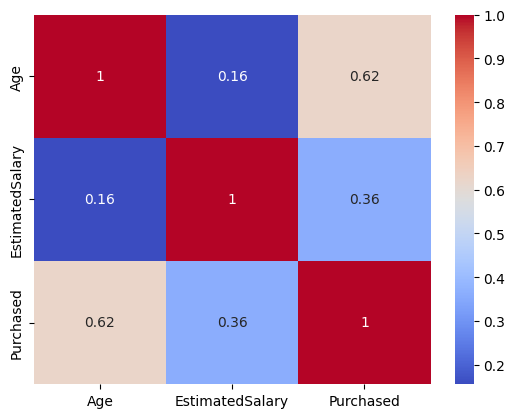

In [ ]:
sns.heatmap(corr,annot=True,cmap="coolwarm")

<Axes: xlabel='Age', ylabel='Purchased'>

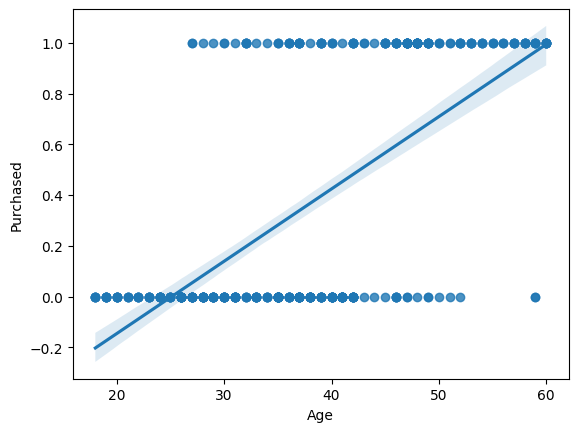

In [ ]:
sns.regplot(x=df["Age"], y=df["Purchased"])

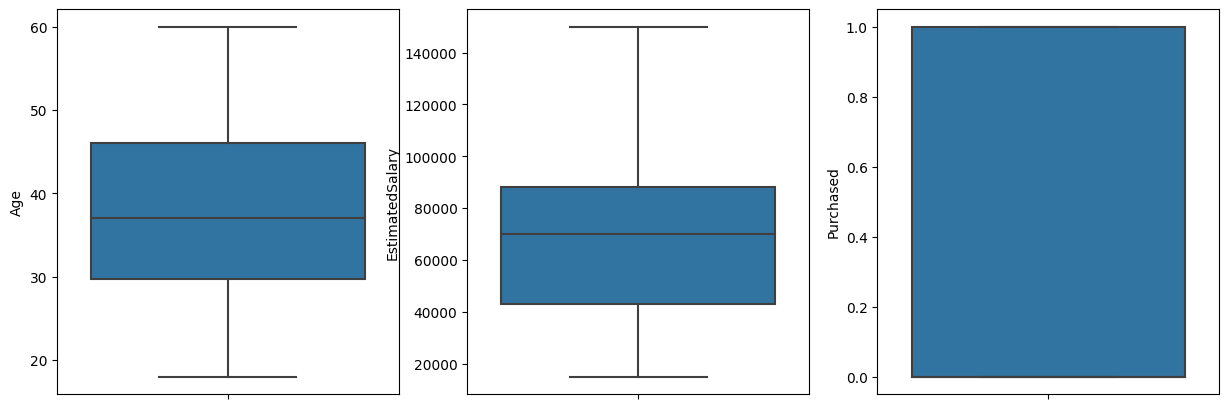

In [ ]:
columns=["Age","EstimatedSalary","Purchased"]
fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
index=0
for col in columns:
  sns.boxplot(y=df[col], ax=ax[index])
  index=index+1

In [ ]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [ ]:
X=df.drop(["Gender","Purchased"], axis=1)
Y=df["Purchased"]

In [ ]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
def report(y_test, y_pred):
  cr=classification_report(y_test, y_pred)
  print(cr)

  predicted_dataframe=pd.DataFrame({"Predicted Purchased ":y_pred , "Actual Purchased ":y_test})
  print(predicted_dataframe)
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
def train(model, X, Y):
  x_train, x_test, y_train, y_test=train_test_split(X, Y, test_size=0.33, random_state=42)
  model.fit(x_train,y_train)
  predicted_y_test=model.predict(x_test)
  print("Testing accuracy:", model.score(x_test,y_test)*100)
  print("Training accuracy:", model.score(x_train,y_train)*100)
  print()
  report(y_test, predicted_y_test)

Testing accuracy: 60.60606060606061
Training accuracy: 66.04477611940298

              precision    recall  f1-score   support

           0       0.61      1.00      0.75        80
           1       0.00      0.00      0.00        52

    accuracy                           0.61       132
   macro avg       0.30      0.50      0.38       132
weighted avg       0.37      0.61      0.46       132

     Predicted Purchased   Actual Purchased 
209                     0                  0
280                     0                  1
33                      0                  0
210                     0                  1
93                      0                  0
..                    ...                ...
332                     0                  0
167                     0                  0
245                     0                  1
311                     0                  1
145                     0                  0

[132 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


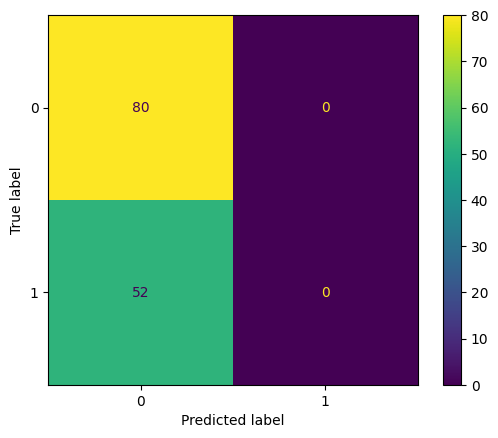

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
train(model, X, Y)

In [ ]:
columns_to_normalise=["Age","EstimatedSalary"]
for col in columns_to_normalise:
  min=df[col].min()
  max=df[col].max()
  df[col]=(df[col]-min)/(max-min)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,0.023810,0.029630,0
1,Male,0.404762,0.037037,0
2,Female,0.190476,0.207407,0
3,Female,0.214286,0.311111,0
4,Male,0.023810,0.451852,0


In [ ]:
X=df.drop(["Gender","Purchased"], axis=1)
Y=df["Purchased"]

Testing accuracy: 82.57575757575758
Training accuracy: 81.71641791044776

              precision    recall  f1-score   support

           0       0.78      0.99      0.87        80
           1       0.97      0.58      0.72        52

    accuracy                           0.83       132
   macro avg       0.87      0.78      0.80       132
weighted avg       0.86      0.83      0.81       132

     Predicted Purchased   Actual Purchased 
209                     0                  0
280                     1                  1
33                      0                  0
210                     1                  1
93                      0                  0
..                    ...                ...
332                     0                  0
167                     0                  0
245                     1                  1
311                     0                  1
145                     0                  0

[132 rows x 2 columns]


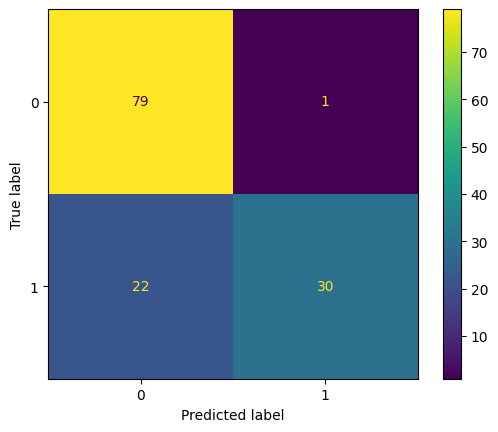

In [ ]:
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
train(model2, X, Y)